In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential, datasets,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dropout, DepthwiseConv2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
#os.environ["CUDA_VISIBLE_DEVICES"]="0"


### Load Cifar-10
https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
###Load both training data and test data from cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
### Normalization for features of x
X_train = np.asarray(x_train, dtype=float)/255
X_test = np.asarray(x_test, dtype=float)/255

In [8]:
print(X_train.max())
print(X_test.max())
print(x_train.shape)


1.0
1.0
(50000, 32, 32, 3)


#### Show that Cifar-10 has been properly imported

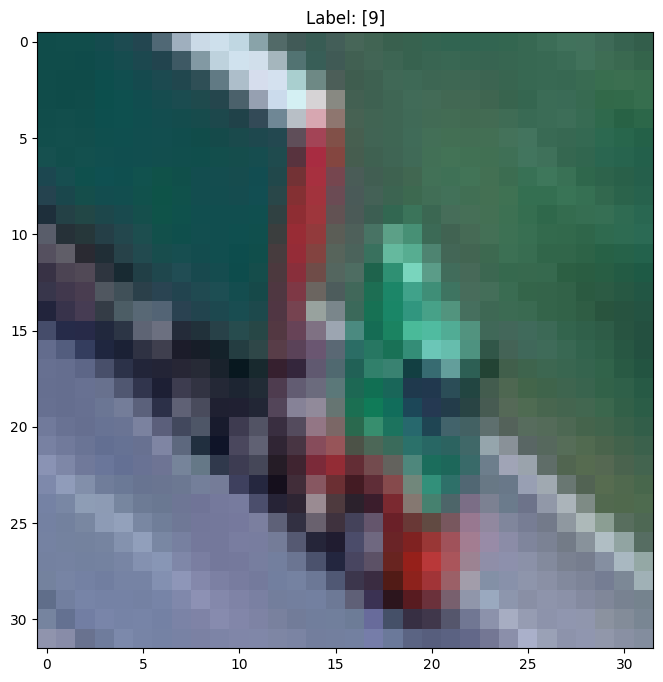

In [9]:
fig = plt.figure(figsize=(8,8))
img = X_train[50]
plt.axis('on')
plt.imshow(img)
plt.title('Label: ' + str(y_train[50]))
plt.show()

e:\Anaconda\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


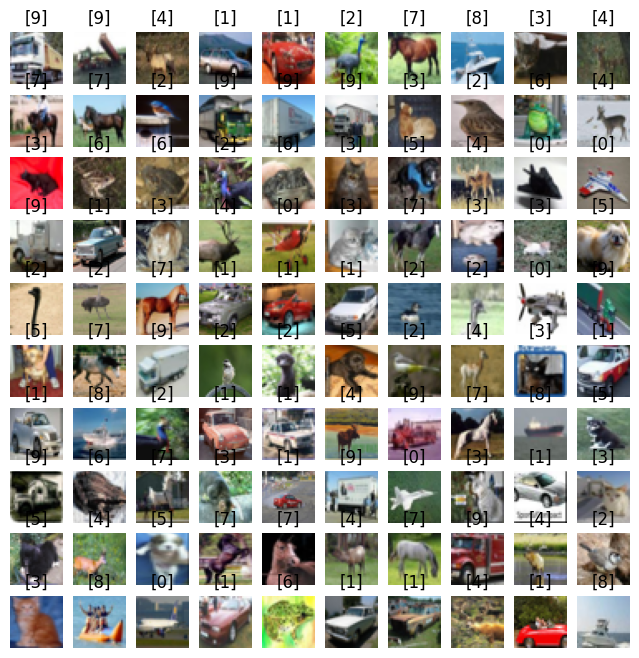

In [10]:
fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(img)
plt.show()

According to the description of Cifar-10, the labels are encoded in to numbers, the corresponding labels are:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

![屏幕截图 2024-04-12 162416.png](<attachment:屏幕截图 2024-04-12 162416.png>)
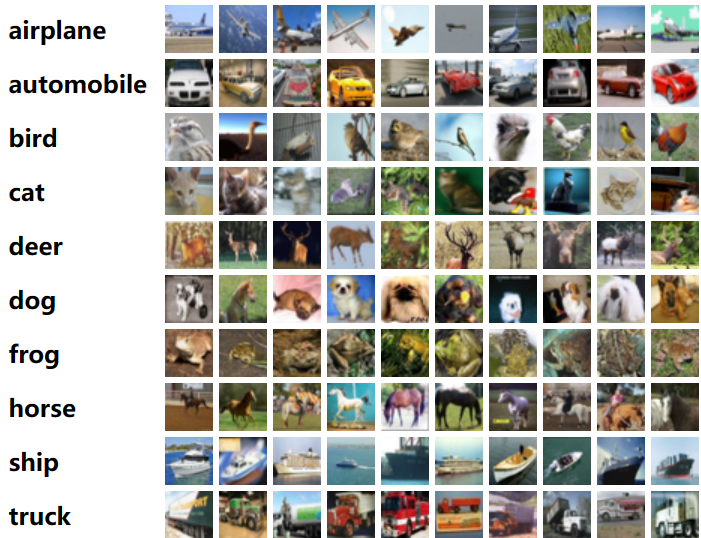

In [11]:
# x_train = x_train/225
# x_test = x_test/255

In [11]:
### Encode label data to one-hot format, with both 10 classes
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)
print(y_cat_train[:5,:])
print(y_cat_test[:5, :])
print(y_train)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


### Build Model - Convolutional Neural Network

In [12]:
from keras.models import Sequential
def create_model():
    model_layers = [
        Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu, depth_multiplier=3),
    #     MaxPooling2D(2, 2),
        Dropout(rate =0.1),
        
        
        Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    #     MaxPooling2D(2, 2),
        Dropout(rate = 0.1),
        
        Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    #     MaxPooling2D(2, 2),
        Dropout(rate = 0.4),
        
        Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
        
        
        Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
        
        
        
        Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
        
    #     MaxPooling2D(2, 2),
        Dropout(rate = 0.4),
        
        Flatten(),
        Dropout(rate = 0.3),
        Dense(2048, activation='relu'),
        Dropout(rate = 0.3),
        Dense(512, activation='relu'),
        Dropout(rate = 0.4),
        Dense(10, activation='softmax')
    ] 
    model = Sequential(model_layers)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# model = Sequential(model_layers)

In [13]:
model = create_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 depthwise_conv2d (Depthwis  (None, 32, 32, 96)        960       
 eConv2D)                                                        
                                                                 
 dropout (Dropout)           (None, 32, 32, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        55360     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)      

In [15]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
### Monitor the validation loss on the validation set, and
### when no decrease takes place in 3 epochs, stop training.

early_stop = EarlyStopping(monitor='val_loss',patience=4)

#### Validation preparasion

In [54]:
X_train_, X_val, Y_train, Y_val = train_test_split(X_train, y_cat_train, random_state=10, test_size=0.3)
X_train_ = X_train[:24500]
Y_train = Y_train[:24500]
X_val = X_val[:10500]
Y_val = Y_val[:10500]
print(np.shape(X_train_))
print(np.shape(X_val))
print(np.shape(Y_train))
print(np.shape(Y_val))

(24500, 32, 32, 3)
(10500, 32, 32, 3)
(24500, 10)
(10500, 10)


### MODEL FIT 1: No augmentation

In [55]:
model.fit(X_train_,Y_train,batch_size=64,epochs=20,validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/20
  1/383 [..............................] - ETA: 1:53 - loss: 2.3029 - accuracy: 0.0781

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

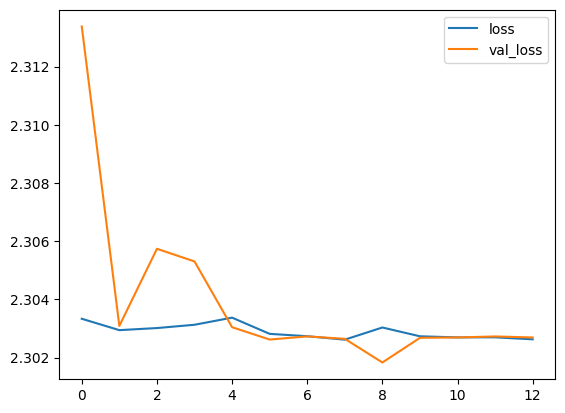

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

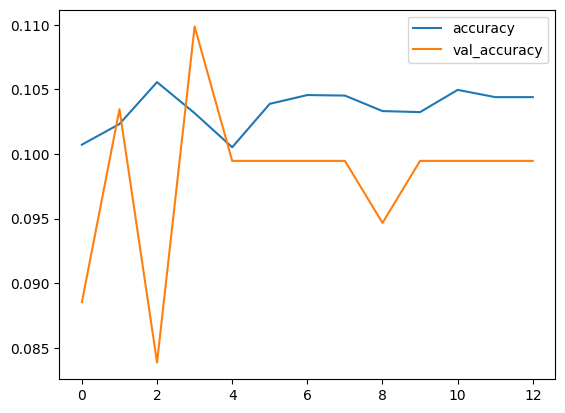

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[2.302708864212036, 0.10000000149011612]


In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 9s 29ms/step


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      1.00      0.18      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('y_train shape: ', np.shape(y_train))
print('y_test shape: ',np.shape(y_test))
print('predictions shape: ', np.shape(predictions))


y_train shape:  (50000, 1)
y_test shape:  (10000, 1)
predictions shape:  (10000,)


In [ ]:
confusion_matrix(y_test,predictions)

array([[   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

Elements on the diagonal represent the number of samples that the model correctly classifies.

Row i column j element: represents the number of samples whose true class is class i and the model predicts is class j.

1/1 [==============================] - 0s 24ms/step
True class: truck 
Predicted class: automobile
1/1 [==============================] - 0s 33ms/step
True class: ship 
Predicted class: automobile
1/1 [==============================] - 0s 25ms/step
True class: horse 
Predicted class: automobile
1/1 [==============================] - 0s 22ms/step
True class: bird 
Predicted class: automobile
1/1 [==============================] - 0s 24ms/step
True class: bird 
Predicted class: automobile


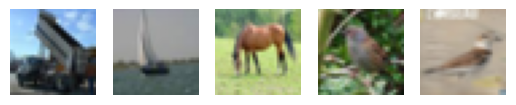

In [ ]:
### Play with specific samples:

classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

# my_image_30 = x_test[30]
# my_image_35 = x_test[35]
# my_image_40 = x_test[40]
# my_image_45 = x_test[45]
# my_image_50 = x_test[50]
i_plot=1
for i in range (50, 71, 5):
    
    plt.subplot(1, 5, i_plot)
    i_plot+=1
    img = X_test[i]
    #fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
    input_img = X_test[i].reshape(1,32,32,3)
    predictions = np.argmax(model.predict(input_img), axis=-1)[0]
    print(f"True class: {d[y_test[i][0]]} \nPredicted class: {d[predictions]}")
plt.show()

#plt.imshow(my_image_30)
#input_img = x_test[i].reshape(1,32,32,3)

#predictions = np.argmax(model.predict(input_img), axis=-1)[0]

#print(f"True class: {d[y_test[20][0]]}, Predicted class: {d[predictions]}")

In [28]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### MODEL FIT 2: WITH Augmentation

#### Define augmentation generator

In [17]:
# Data augumetation
datagen = ImageDataGenerator(
        rotation_range=0.3,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)
datagen_original = ImageDataGenerator()

In [18]:
def generate_combined_batches(X_train_, Y_train, batch_size=64):
    # 每个生成器产生一半的数据量
    half_batch_size = batch_size // 2
    gen_augmented = datagen.flow(X_train_, Y_train, batch_size=half_batch_size)      #Generate augumented data with half the samples
    gen_original = datagen_original.flow(X_train_, Y_train, batch_size=batch_size)   #Generate original data with full the samples
    while True:
        X_batch_augmented, Y_batch_augmented = next(gen_augmented)
        X_batch_original, Y_batch_original = next(gen_original)
        X_batch_combined = np.vstack((X_batch_augmented, X_batch_original))
        Y_batch_combined = np.vstack((Y_batch_augmented, Y_batch_original))
        yield (X_batch_combined, Y_batch_combined)


#### Fit 2.1

In [40]:
#Previous model settings here for comparison:
#model.fit(X_train,Y_train,batch_size=64,epochs=20,
#           validation_data=(X_val,Y_val),callbacks=[early_stop])
model_ = create_model()
#model_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_.fit(
    generate_combined_batches(X_train_, Y_train, batch_size=64), validation_data=(X_val, Y_val),
      callbacks=[early_stop], epochs=20, steps_per_epoch=len(X_train_) // 64 )
#Unused parameter: >>>steps_per_epoch=len(X_train) // 64

Epoch 1/20
390/390 [==============================] - 148s 374ms/step - loss: 2.3041 - accuracy: 0.0990 - val_loss: 2.3030 - val_accuracy: 0.0995
Epoch 2/20
390/390 [==============================] - 147s 377ms/step - loss: 2.3033 - accuracy: 0.1025 - val_loss: 2.3024 - val_accuracy: 0.1027
Epoch 3/20
390/390 [==============================] - 151s 387ms/step - loss: 2.3031 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.0808
Epoch 4/20
390/390 [==============================] - 149s 382ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3035 - val_accuracy: 0.0995
Epoch 5/20
390/390 [==============================] - 148s 380ms/step - loss: 2.3028 - accuracy: 0.1036 - val_loss: 2.3026 - val_accuracy: 0.0995
Epoch 6/20
390/390 [==============================] - 140s 360ms/step - loss: 2.3030 - accuracy: 0.1016 - val_loss: 2.3028 - val_accuracy: 0.0995


In [41]:
losses_ = pd.DataFrame(model_.history.history)

<Axes: >

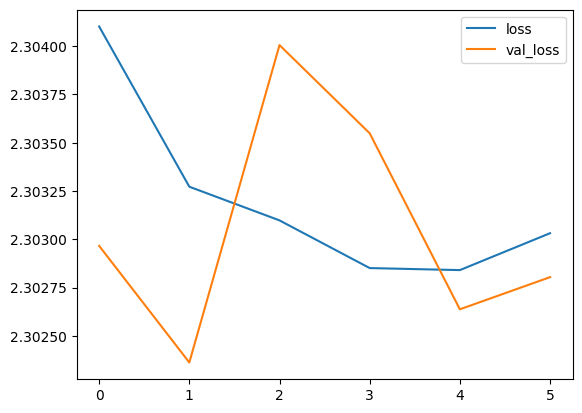

In [42]:
losses_[['loss','val_loss']].plot()

<Axes: >

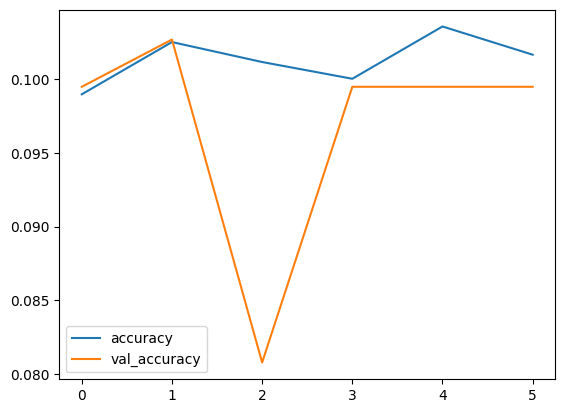

In [43]:
losses_[['accuracy','val_accuracy']].plot()

In [44]:
print(model_.metrics_names)
print(model_.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[2.3028247356414795, 0.10000000149011612]


In [45]:
predictions = np.argmax(model_.predict(X_test), axis=-1)

313/313 [==============================] - 9s 27ms/step


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      1.00      0.18      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
print('y_train shape: ', np.shape(y_train))
print('y_test shape: ',np.shape(y_test))
print('predictions shape: ', np.shape(predictions))


y_train shape:  (50000, 1)
y_test shape:  (10000, 1)
predictions shape:  (10000,)


In [48]:
confusion_matrix(y_test,predictions)

array([[   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

Elements on the diagonal represent the number of samples that the model correctly classifies.

Row i column j element: represents the number of samples whose true class is class i and the model predicts is class j.

1/1 [==============================] - 0s 26ms/step
True class: truck 
Predicted class: automobile
1/1 [==============================] - 0s 28ms/step
True class: ship 
Predicted class: automobile
1/1 [==============================] - 0s 25ms/step
True class: horse 
Predicted class: automobile


1/1 [==============================] - 0s 26ms/step
True class: bird 
Predicted class: automobile
1/1 [==============================] - 0s 28ms/step
True class: bird 
Predicted class: automobile


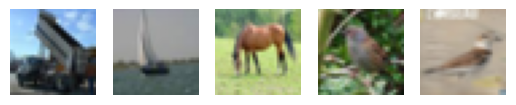

In [49]:
### Play with specific samples:

classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

# my_image_30 = x_test[30]
# my_image_35 = x_test[35]
# my_image_40 = x_test[40]
# my_image_45 = x_test[45]
# my_image_50 = x_test[50]
i_plot=1
for i in range (50, 71, 5):
    
    plt.subplot(1, 5, i_plot)
    i_plot+=1
    img = X_test[i]
    #fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
    input_img = X_test[i].reshape(1,32,32,3)
    predictions = np.argmax(model.predict(input_img), axis=-1)[0]
    print(f"True class: {d[y_test[i][0]]} \nPredicted class: {d[predictions]}")
plt.show()

#plt.imshow(my_image_30)
#input_img = x_test[i].reshape(1,32,32,3)

#predictions = np.argmax(model.predict(input_img), axis=-1)[0]

#print(f"True class: {d[y_test[20][0]]}, Predicted class: {d[predictions]}")

CNN WITH NO AUGMENTATION, 20% TRAINING SET FOR VALIDATION

In [41]:
# X_train_80, X_val, Y_train, Y_val = train_test_split(X_train, y_cat_train, random_state=0, test_size=0.3)
# print(np.shape(X_train_80))
# print(np.shape(X_val))
# print(np.shape(Y_train))
# print(np.shape(Y_val))

#### Fit 2.2 (Try again with no augmentation)

In [42]:
model__ = create_model()
model__.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model__.fit(X_train_,Y_train,batch_size=64,epochs=20,validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/20
547/547 [==============================] - 173s 311ms/step - loss: 1.4938 - accuracy: 0.4504 - val_loss: 1.5388 - val_accuracy: 0.4349
Epoch 2/20
547/547 [==============================] - 166s 303ms/step - loss: 1.0581 - accuracy: 0.6235 - val_loss: 0.8963 - val_accuracy: 0.6849
Epoch 3/20
547/547 [==============================] - 170s 310ms/step - loss: 0.9008 - accuracy: 0.6855 - val_loss: 0.9747 - val_accuracy: 0.6671
Epoch 4/20
547/547 [==============================] - 167s 306ms/step - loss: 0.7929 - accuracy: 0.7235 - val_loss: 0.8635 - val_accuracy: 0.6940
Epoch 5/20
547/547 [==============================] - 166s 303ms/step - loss: 0.7178 - accuracy: 0.7497 - val_loss: 0.7818 - val_accuracy: 0.7335
Epoch 6/20
547/547 [==============================] - 168s 307ms/step - loss: 0.6632 - accuracy: 0.7701 - val_loss: 0.6750 - val_accuracy: 0.7701
Epoch 7/20
547/547 [==============================] - 168s 307ms/step - loss: 0.6131 - accuracy: 0.7864 - val_loss: 0.6868 -

In [43]:
losses = pd.DataFrame(model__.history.history)

<Axes: >

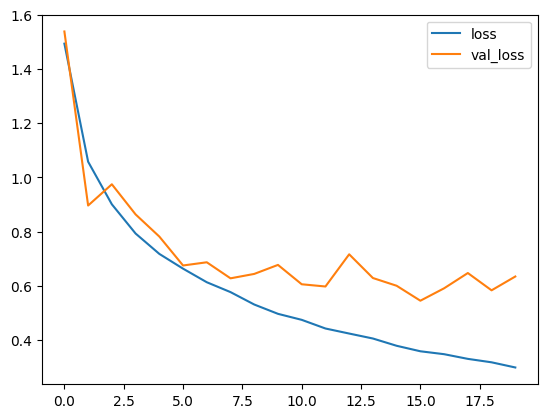

In [44]:
losses[['loss','val_loss']].plot()

<Axes: >

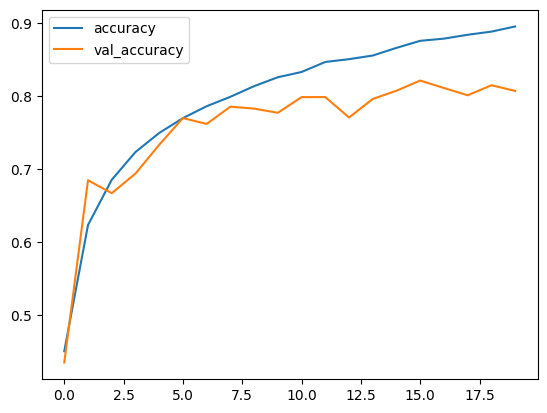

In [45]:
losses[['accuracy','val_accuracy']].plot()

In [46]:
print(model__.metrics_names)
print(model__.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.6393366456031799, 0.8065000176429749]


In [47]:
predictions = np.argmax(model__.predict(X_test), axis=-1)

313/313 [==============================] - 8s 25ms/step


In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1000
           1       0.94      0.87      0.91      1000
           2       0.83      0.66      0.73      1000
           3       0.74      0.57      0.65      1000
           4       0.84      0.75      0.79      1000
           5       0.66      0.83      0.74      1000
           6       0.87      0.86      0.87      1000
           7       0.83      0.86      0.84      1000
           8       0.78      0.95      0.86      1000
           9       0.80      0.94      0.86      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [49]:
print('y_train shape: ', np.shape(y_train))
print('y_test shape: ',np.shape(y_test))
print('predictions shape: ', np.shape(predictions))


y_train shape:  (50000, 1)
y_test shape:  (10000, 1)
predictions shape:  (10000,)


In [50]:
confusion_matrix(y_test,predictions)

array([[778,  10,   8,  11,   4,   3,   4,   6, 124,  52],
       [  8, 874,   1,   0,   1,   1,   6,   1,  27,  81],
       [ 70,   2, 656,  35,  51,  83,  44,  22,  18,  19],
       [ 21,   5,  40, 572,  28, 193,  44,  33,  35,  29],
       [ 14,   2,  29,  37, 748,  54,  15,  78,  17,   6],
       [  9,   2,  13,  71,  17, 829,  11,  27,  10,  11],
       [  9,   2,  28,  25,  24,  27, 864,   8,   7,   6],
       [ 10,   3,   7,  11,  17,  60,   6, 859,   4,  23],
       [ 20,   8,   3,   5,   0,   4,   2,   0, 946,  12],
       [  8,  23,   1,   3,   0,   1,   1,   4,  20, 939]], dtype=int64)

Elements on the diagonal represent the number of samples that the model correctly classifies.

Row i column j element: represents the number of samples whose true class is class i and the model predicts is class j.

1/1 [==============================] - 0s 32ms/step
True class: truck 
Predicted class: truck
1/1 [==============================] - 0s 24ms/step
True class: ship 
Predicted class: ship
1/1 [==============================] - 0s 21ms/step
True class: horse 
Predicted class: horse
1/1 [==============================] - 0s 21ms/step
True class: bird 
Predicted class: bird
1/1 [==============================] - 0s 22ms/step
True class: bird 
Predicted class: cat


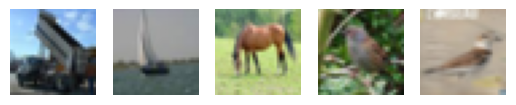

In [51]:
### Play with specific samples:

classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

# my_image_30 = x_test[30]
# my_image_35 = x_test[35]
# my_image_40 = x_test[40]
# my_image_45 = x_test[45]
# my_image_50 = x_test[50]
i_plot=1
for i in range (50, 71, 5):
    
    plt.subplot(1, 5, i_plot)
    i_plot+=1
    img = X_test[i]
    #fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
    input_img = X_test[i].reshape(1,32,32,3)
    predictions = np.argmax(model.predict(input_img), axis=-1)[0]
    print(f"True class: {d[y_test[i][0]]} \nPredicted class: {d[predictions]}")
plt.show()

#plt.imshow(my_image_30)
#input_img = x_test[i].reshape(1,32,32,3)

#predictions = np.argmax(model.predict(input_img), axis=-1)[0]

#print(f"True class: {d[y_test[20][0]]}, Predicted class: {d[predictions]}")